# 生成泊松过程
算法：首先生成一系列的指数分布，假设：$x_i\sim E(0,1/\lambda),i=0,1,...$，那么给定时间$t$，泊松分布可以由以下过程生成：$$ N(t)=\arg \min_t \left\{ \sum _{i=0} ^{\infty} x_i \leq t \right\}$$

In [1]:
import numpy as np
import numpy.random as nprd

## 设定参数
b=1.0/100 #指数分布参数,一个小时平均到达100次
Nexp=2000 #生成足够多的指数分布

## 生成N个x~F(x)=1-exp{-(1/b)*x}
X=-b*np.log(nprd.random(Nexp))
S=[]
s=0
# 产生累积和
for x in X:
    s=s+x
    S.append(s)

## 给定一些时间点，比如从第一分钟到敌五分钟，在这些点上计算到达的个数
t=np.linspace(0.0,5.0/60,500) #0.1,0.3,...,9.9
N=np.zeros(len(t))
i=0
for tt in range(len(t)):
    while t[tt]>=S[i]:
        i=i+1
    N[tt]=i


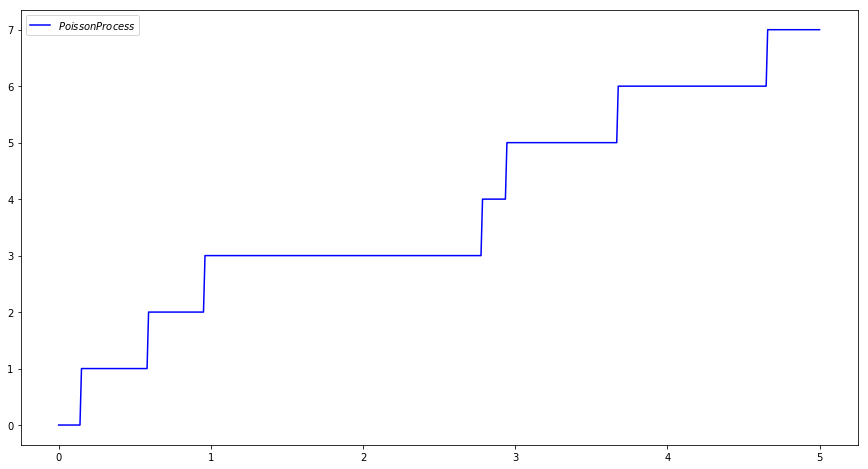

In [2]:
## 导入matplotlib
import matplotlib.pyplot as plt 
## 使图形直接插入到jupyter中
%matplotlib inline
# 设定图像大小
plt.rcParams['figure.figsize'] = (15.0, 8.0)

t_plot=[tt*60 for tt in t]
plt.plot(t_plot,N,label=r'$Poisson Process$',color='blue')
plt.legend(loc='upper left', frameon=True)
plt.show() ## 画图

# 复合泊松过程
算法：给定$N(t)$为一个泊松过程，现在假设$Z_j\sim N(0,1)$，那么复合泊松过程为：$$M(t)=\sum _{j=1} ^{N(t)} Z_j$$

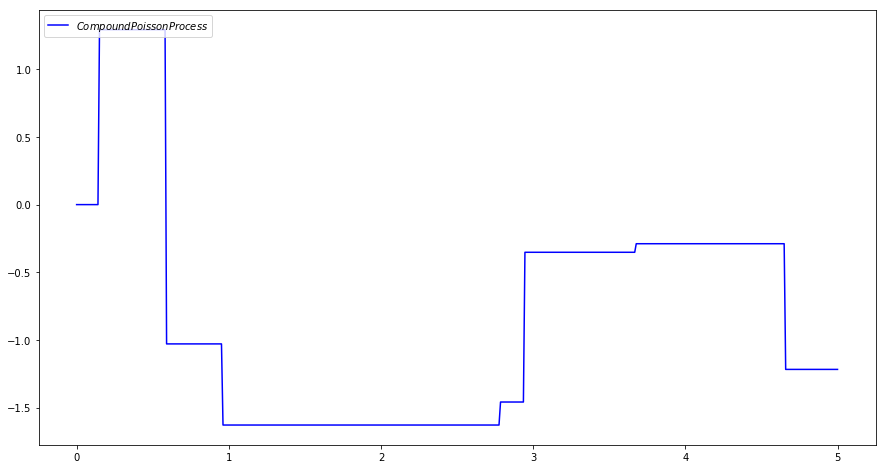

In [3]:
# 生成一系列正态分布
Z=nprd.normal(0,1,int(N[-1]))
SZ=[]
s=0
for z in Z:
    s=s+z
    SZ.append(s)

# 生成复合泊松过程
M=[]
for n in N:
    if int(n)==0:
        M.append(0)
    else:
        M.append(SZ[int(n)-1])
M=np.array(M)

## 导入matplotlib
import matplotlib.pyplot as plt 
## 使图形直接插入到jupyter中
%matplotlib inline
# 设定图像大小
plt.rcParams['figure.figsize'] = (15.0, 8.0)

t_plot=[tt*60 for tt in t]
plt.plot(t_plot,M,label=r'$Compound Poisson Process$',color='blue')
plt.legend(loc='upper left', frameon=True)
plt.show() ## 画图